In this notebook, I provide an regression of temperature using satellite based measurement from Land Surface Temeperature from MODIS.
The goal is to show the relationship using between satellite measurements and ground temperature meteorological station.


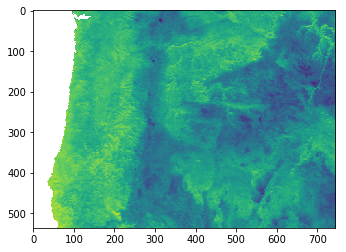

CRS({})

In [183]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio
import subprocess
import pandas as pd
import os, glob
from rasterio import plot
import geopandas as gpd
import georasters as gr


in_dir="/nfs/bparmentier-data/Data/workshop_spatial/climate_regression/data/Oregon_covariates"
out_dir="/nfs/bparmentier-data/Data/workshop_spatial/climate_regression/outputs"

#epsg 2991
crs_reg = "+proj=lcc +lat_1=43 +lat_2=45.5 +lat_0=41.75 +lon_0=-120.5 +x_0=400000 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs"

infile = "mean_month1_rescaled.rst"
infile_forest_perc =""
#infile = "mean_month1_rescaled.tif"
#infile = "lst_mean_month1_rescaled.tif"

ghcn_filename = "ghcn_or_tmax_covariates_06262012_OR83M.shp"


data_gpd = gpd.read_file(os.path.join(in_dir,ghcn_filename))

data_gpd 

# -12 layers from land cover concensus (Jetz lab)
fileglob = "*.rst"
pathglob = os.path.join(in_dir, fileglob)
l_f = glob.glob(pathglob)
l_f.sort() #order input by decade
l_dir = map(lambda x: os.path.splitext(x)[0],l_f) #remmove extension
l_dir = map(lambda x: os.path.join(out_dir,os.path.basename(x)),l_dir) #set the directory output
 

# Read raster bands directly to Numpy arrays.
with rasterio.open(os.path.join(in_dir,infile)) as src:
        r_lst = src.read(1,masked=True) #read first array with masked value, nan are assigned for NA
        spatial_extent = rasterio.plot.plotting_extent(src)

plot.show(r_lst)
#plot.show(r_lst,cmap='viridis',scheme='quantiles')

src.crs # not defined with *.rst

In [184]:
r_lst.size
#r_lst.ndim #array dimension
src.height
#src.profile
type(r_lst)

numpy.ma.core.MaskedArray

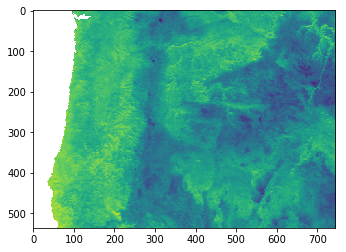

In [185]:
#Can also use the regular matplotlib library function to plot images
#plt.imshow(subset)
plt.imshow(r_lst)
#plt.hist(r_lst)


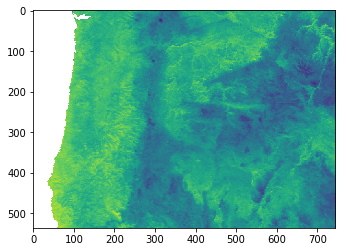

In [186]:
#see: https://matplotlib.org/users/image_tutorial.html
plt.imshow(r_lst, clim=(259.0, 287.0))

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 9.000e+00, 4.000e+00, 6.000e+00,
        7.000e+00, 8.000e+00, 6.000e+00, 1.000e+01, 1.100e+01, 1.400e+01,
        6.000e+00, 2.400e+01, 1.800e+01, 2.700e+01, 3.300e+01, 3.600e+01,
        4.100e+01, 5.000e+01, 7.700e+01, 6.800e+01, 7.300e+01, 8.400e+01,
        1.190e+02, 1.110e+02, 1.400e+02, 1.350e+02, 1.820e+02, 1.730e+02,
        2.020e+02, 2.230e+02, 2.380e+02, 2.890e+02, 3.170e+02, 3.280e+02,
        3.920e+02, 4.380e+02, 4.780e+02, 5.140e+02, 4.960e+02, 5.900e+02,
        7.000e+02, 7.140e+02, 7.150e+02, 8.290e+02, 9.490e+02, 9.770e+02,
        1.029e+03, 1.066e+03, 1.125e+0

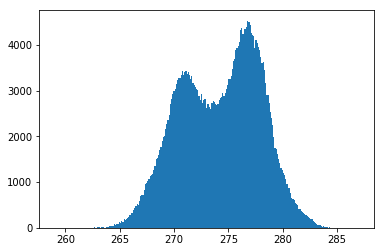

In [187]:
plt.hist(r_lst.ravel(),bins=256,range=(259.0,287.0))

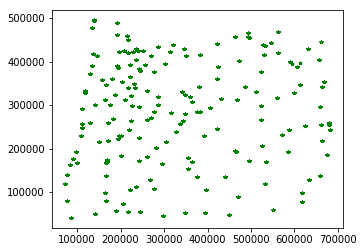

In [188]:
data_gpd.plot(marker="*",color="green",markersize=5)
station_or = data_gpd.to_crs({'init': 'epsg:2991'})

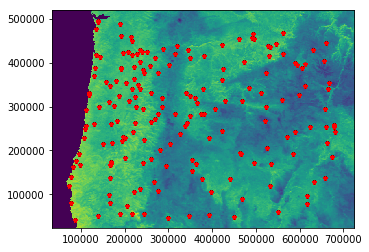

In [189]:
#https://www.earthdatascience.org/courses/earth-analytics-python/lidar-raster-data/customize-matplotlib-raster-maps/

fig, ax = plt.subplots()
with rasterio.open(os.path.join(in_dir,infile)) as src:
        rasterio.plot.show((src,1),ax=ax,
                          clim=(259.0,287.0),)

#plot.show(r_lst, clim=(259.0, 287.0),ax=ax)
#with rasterio.plot.show((src,1),ax=ax)
station_or.plot(ax=ax,marker="*",
              color="red",
               markersize=10)

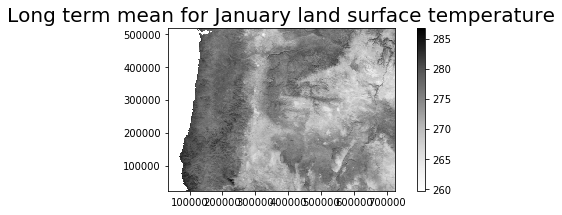

In [190]:
fig, ax = plt.subplots(figsize = (8,3))
lst_plot = ax.imshow(r_lst, 
                       cmap='Greys', 
                       extent=spatial_extent)
ax.set_title("Long term mean for January land surface temperature", fontsize= 20)
fig.colorbar(lst_plot)
# turn off the x and y axes for prettier plotting
#ax.set_axis_off(); #this removes coordinates on the plot

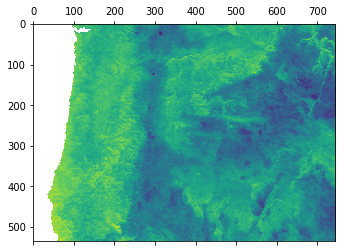

In [191]:
#raster = './data/slope.tif'
data=gr.from_file(os.path.join(in_dir,infile))
# Plot data
data.plot()

In [192]:
x_coord = station_or.geometry.x # pands.core.series.Series
y_coord = station_or.geometry.y

# Find value at point (x,y) or at vectors (X,Y)
values = data.map_pixel(x_coord,y_coord)
list(station_or) #get names of col
station_or['year'].value_counts()
station_or.groupby(['month'])['value'].mean()



month
1     -400.156785
2    -1241.282837
3     -267.490287
4     -594.049982
5     -328.350230
6     -563.981541
7     -198.206452
8     -306.864552
9     -592.981183
10    -494.211470
11    -720.368793
12    -339.014237
Name: value, dtype: float64

In [193]:
print("number of rows:",station_or.station.count(),"number of stations:",len(station_or.station.unique()))
station_or['LST1'] = value-273.15
station_or_jan = station_or.loc[(station_or['month']==1) & (station_or['value']!=-9999)]
station_or_jan.head()
#avg_df = station_or.groupby(['station'])['value'].mean())
avg_df = station_or_jan.groupby(['station'])['value','LST1'].mean()
avg_df['value']= avg_df['value']/10
avg_df.head()

number of rows: 67053 number of stations: 186


value      LST1
station                         
USC00350036   6.640741  5.688080
USC00350118   7.542857  2.201294
USC00350145  10.064286  5.162262
USC00350197   7.183333  2.355988
USC00350265   7.061290  4.276459

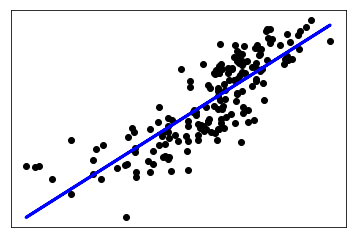

reg coef [[0.71763843]]
reg intercept [5.8663054]


0.6859319356294472

In [194]:
from sklearn.linear_model import LinearRegression
x=avg_df.LST1.values
y=avg_df.value.values
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)
regr = LinearRegression().fit(x,y)

#regr = linear_model.LinearRegression()
regr.fit(x, y)

# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

print('reg coef',regr.coef_)
print('reg intercept',regr.intercept_)

reg.predict(x) # Note this is a fit!
reg.score(x, y)

